In [1]:
import torch
from torch.utils.data import DataLoader as TorchDataLoader

import sys, os
sys.path.append(os.path.abspath(".."))


from DL_vs_HateSpeech.models.model_v0 import ModelV0
from DL_vs_HateSpeech.loading_data.dataloader import DataLoader
from DL_vs_HateSpeech.training.training import (
    collate_fn,
    get_optimizer_and_criterion,
    train_epoch
)
from DL_vs_HateSpeech.evaluation.evaluate import evaluate
from DL_vs_HateSpeech.plots.plot_loss import plot_losses

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/home/jack/anaconda3/envs/ee559/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Hyperparameters
BATCH_SIZE = 16
LR = 1e-5
EPOCHS = 10

# Load Data
train_dataset = DataLoader(type="train")
val_dataset = DataLoader(type="val")

train_loader = TorchDataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader = TorchDataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)


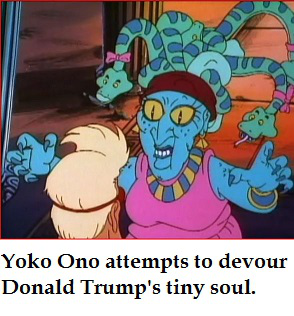

In [3]:
for images, texts, labels in train_loader:
    images[0].show()
    break

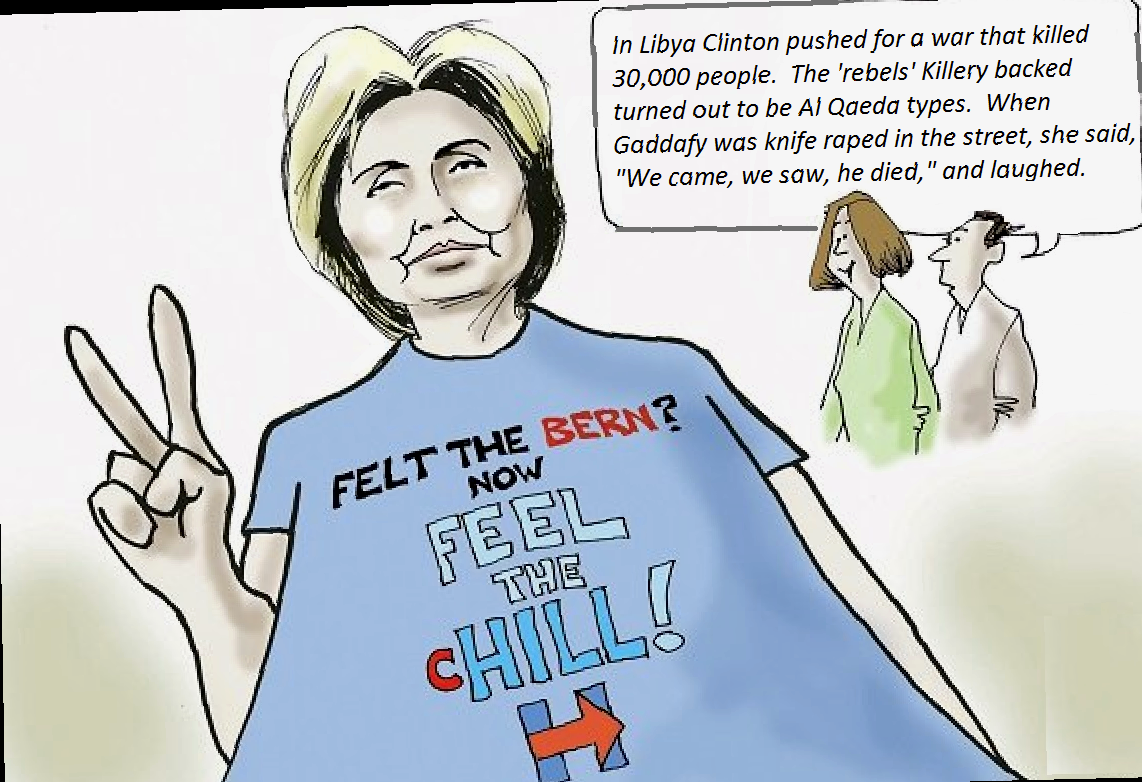

In [4]:
from models.augmentation import augment_batch

for images, texts, labels in train_loader:
    l = len(images)
    texts, images = augment_batch(texts, images)
    images[l+1].show()
    break


Epoch 1/10


Training: 100%|██████████| 28/28 [02:36<00:00,  5.57s/it]


Train Loss: 0.6905


Evaluating: 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


Val Loss: 0.7037
Val Accuracy: 61.07%

Epoch 2/10


Training: 100%|██████████| 28/28 [02:58<00:00,  6.39s/it]


Train Loss: 0.6916


Evaluating: 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]


Val Loss: 0.6795
Val Accuracy: 61.07%

Epoch 3/10


Training: 100%|██████████| 28/28 [03:00<00:00,  6.45s/it]


Train Loss: 0.6879


Evaluating: 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


Val Loss: 0.6886
Val Accuracy: 61.07%

Epoch 4/10


Training: 100%|██████████| 28/28 [03:04<00:00,  6.60s/it]


Train Loss: 0.6911


Evaluating: 100%|██████████| 10/10 [00:05<00:00,  1.75it/s]


Val Loss: 0.6844
Val Accuracy: 61.07%

Epoch 5/10


Training: 100%|██████████| 28/28 [03:06<00:00,  6.66s/it]


Train Loss: 0.6850


Evaluating: 100%|██████████| 10/10 [00:06<00:00,  1.52it/s]


Val Loss: 0.6833
Val Accuracy: 61.07%

Epoch 6/10


Training: 100%|██████████| 28/28 [03:18<00:00,  7.08s/it]


Train Loss: 0.6856


Evaluating: 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]


Val Loss: 0.6768
Val Accuracy: 61.07%

Epoch 7/10


Training: 100%|██████████| 28/28 [03:31<00:00,  7.54s/it]


Train Loss: 0.6846


Evaluating: 100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


Val Loss: 0.6769
Val Accuracy: 61.07%

Epoch 8/10


Training: 100%|██████████| 28/28 [03:37<00:00,  7.78s/it]


Train Loss: 0.6789


Evaluating: 100%|██████████| 10/10 [00:09<00:00,  1.00it/s]


Val Loss: 0.6802
Val Accuracy: 61.07%

Epoch 9/10


Training: 100%|██████████| 28/28 [03:16<00:00,  7.03s/it]


Train Loss: 0.6847


Evaluating: 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]


Val Loss: 0.6770
Val Accuracy: 61.07%

Epoch 10/10


Training: 100%|██████████| 28/28 [03:09<00:00,  6.76s/it]


Train Loss: 0.6855


Evaluating: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]


Val Loss: 0.6743
Val Accuracy: 61.07%


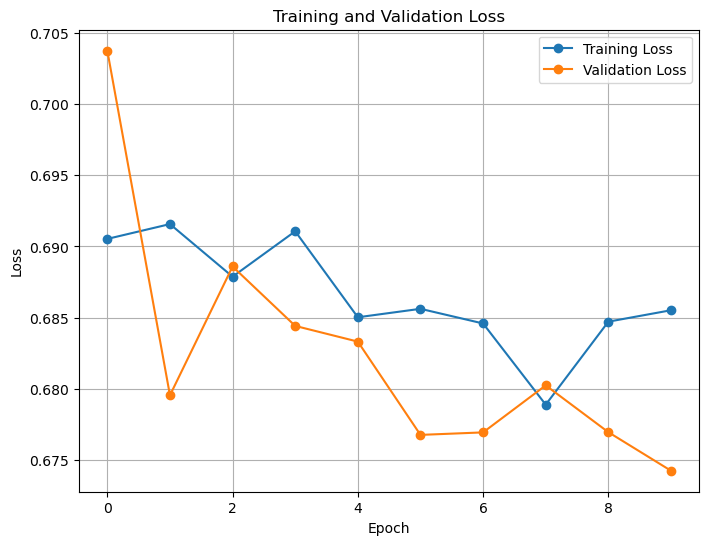

In [5]:
# Initialize Model, Optimizer, Loss
model = ModelV0(clip_model_type="32").to(device)
optimizer, criterion = get_optimizer_and_criterion(model, lr=LR)

# Training and evaluation loop
train_losses = []
val_losses = []

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch + 1}/{EPOCHS}")

    # Train
    train_loss = train_epoch(model, train_loader, optimizer, criterion, device)
    print(f"Train Loss: {train_loss:.4f}")
    train_losses.append(train_loss)

    # Evaluation loss and accuracy
    val_loss, val_accuracy = evaluate(model, val_loader, criterion, device)
    print(f"Val Loss: {val_loss:.4f}")
    print(f"Val Accuracy: {val_accuracy * 100:.2f}%")
    val_losses.append(val_loss)

# Plot at the end
plot_losses(train_losses, val_losses)
